In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

# 【問題1】練習のために特徴量の選択

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df_X = df[['GrLivArea','YearBuilt']] # 説明変数の取得
df_y = df[['SalePrice']] # 目的変数の取得
df_Xy = pd.concat([df_X, df_y], axis = 1)

# 【問題2】線形回帰による推定と評価

## ① データの確認

In [4]:
df_Xy.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [5]:
df_Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [6]:
df_Xy.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


## データ結果：
「説明変数」「目的変数」ともにすべて「量的データ」

## ② 欠損値の確認

In [7]:
#欠損値の確認
df_Xy.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

## データ結果：
データセットに欠損値なし

## ③ 特徴量に関する相関係数行列を作成

In [8]:
df_Xy_corr = df_Xy.corr()
df_Xy_corr 

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


## データ結果：
目的変数「SalePrice」に対する相関係数は「GrLivArea」は「0.708624」、「YearBuilt」は「0.522897」

## ④ DataFrameをndarrayに変換

In [9]:
X = df_X.values.tolist() 
y = df_y.values.tolist() 

## ⑤ 訓練データと検証データの分割

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # 訓練データ75%、検証データ25%として分割

## ⑥ 標準化

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## ⑦ 線形回帰 による学習と推定

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = reg.fit(X_train_std, y_train)
y_pred = reg.predict(X_test_std) # 予測

## ⑧ モデルの評価

In [13]:
#  平均二乗誤差（Mean Squared Error, MSE）
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2725908099.063638

## ⑨ 推測した住宅価格の可視化

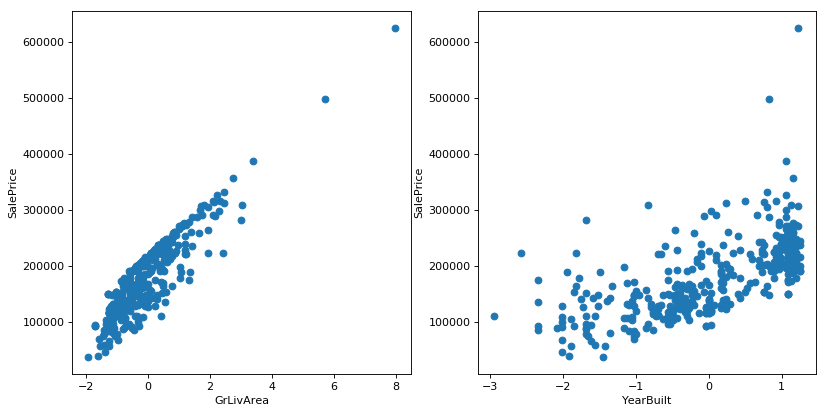

In [14]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(12, 6), dpi = 80)

# 縦軸「GrLivArea」　横軸「SalePrice」
plt.subplot(row, col, 1)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 0], y_pred)

# 縦軸「YearBuilt」　横軸「SalePrice」
plt.subplot(row, col, 2)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 1], y_pred)

# 【問題3】手法の比較

## ① 線形回帰

In [15]:
from sklearn.linear_model import LinearRegression

clf_reg = LinearRegression()
clf_reg = clf_reg.fit(X_train_std, y_train)
y_pred_reg = clf_reg.predict(X_test_std) # 予測

In [16]:
#  平均二乗誤差（Mean Squared Error, MSE）
mse_reg = mean_squared_error(y_test, y_pred_reg)
mse_reg

2725908099.063638

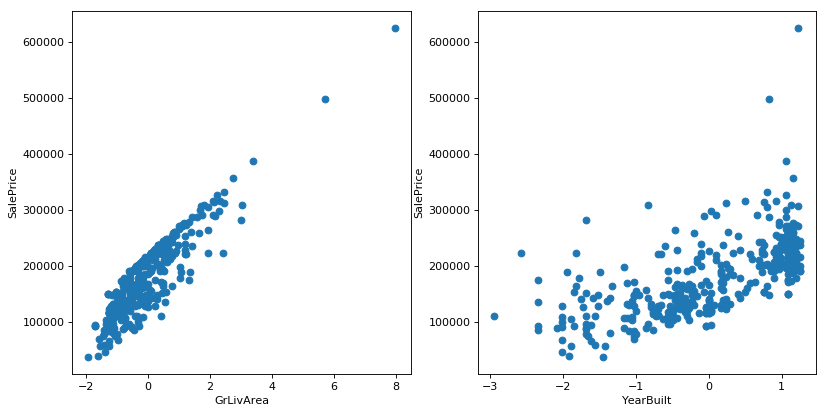

In [17]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(12, 6), dpi = 80)

# 縦軸「GrLivArea」　横軸「SalePrice」
plt.subplot(row, col, 1)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 0], y_pred_reg)

# 縦軸「YearBuilt」　横軸「SalePrice」
plt.subplot(row, col, 2)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 1], y_pred_reg)

## ② SVM

In [18]:
from sklearn.svm import SVC

clf_svc = SVC(gamma='auto') # SVMのインスタンスを生成
clf_svc.fit(X_train_std, y_train)
y_pred_svc = clf_svc.predict(X_test_std) # 予測

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#  平均二乗誤差（Mean Squared Error, MSE）
mse_svc = mean_squared_error(y_test, y_pred_svc)
mse_svc

3136918488.6986303

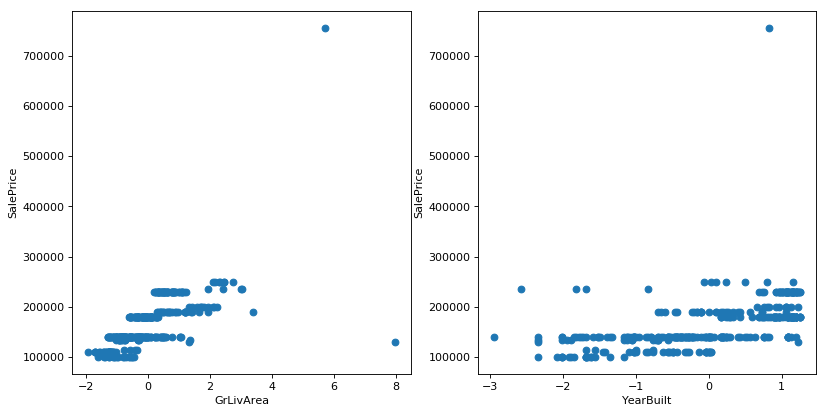

In [20]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(12, 6), dpi = 80)

# 縦軸「GrLivArea」　横軸「SalePrice」
plt.subplot(row, col, 1)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 0],y_pred_svc)

# 縦軸「YearBuilt」　横軸「SalePrice」
plt.subplot(row, col, 2)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 1], y_pred_svc)

## ③ 決定木

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=0) # 決定木のインスタンスを生成
clf_tree.fit(X_train_std, y_train)
y_pred_tree = clf_tree.predict(X_test_std) # 予測

In [22]:
#  平均二乗誤差（Mean Squared Error, MSE）
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_tree

3399978359.50137

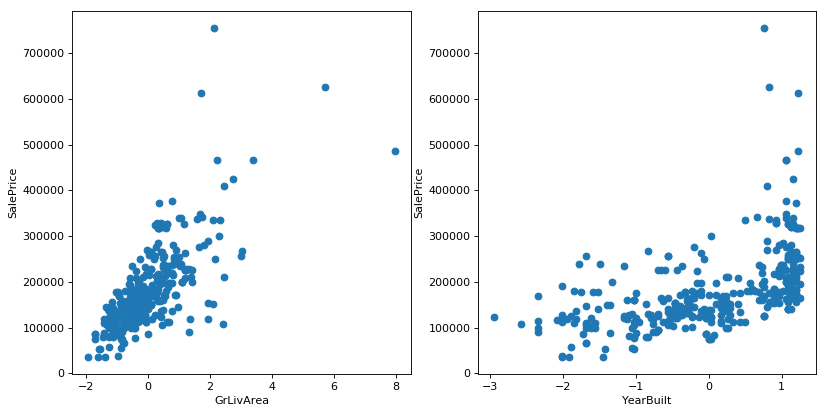

In [23]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(12, 6), dpi = 80)

# 縦軸「GrLivArea」　横軸「SalePrice」
plt.subplot(row, col, 1)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 0],y_pred_tree)

# 縦軸「YearBuilt」　横軸「SalePrice」
plt.subplot(row, col, 2)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 1], y_pred_tree)

## ④ ランダムフォレスト

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=0) # ランダムフォレストのインスタンスを生成
clf_rf.fit(X_train_std, y_train)
y_pred_rf = clf_rf.predict(X_test_std) # 予測

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [25]:
#  平均二乗誤差（Mean Squared Error, MSE）
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

4190717639.3835616

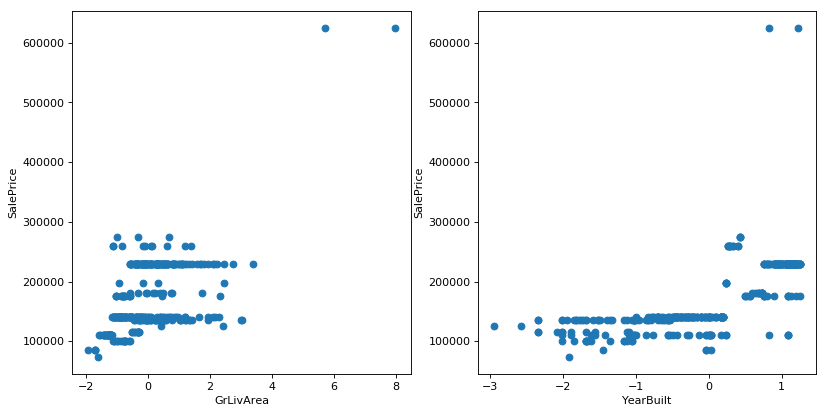

In [26]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(12, 6), dpi = 80)

# 縦軸「GrLivArea」　横軸「SalePrice」
plt.subplot(row, col, 1)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 0],y_pred_rf)

# 縦軸「YearBuilt」　横軸「SalePrice」
plt.subplot(row, col, 2)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test_std[:, 1], y_pred_rf)

## 各手法の指標値

In [27]:
df_mse = pd.DataFrame([mse_reg, mse_svc, mse_tree, mse_rf],  index = ['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'], columns = ["MSE"])
df_mse

,MSE
線形回帰,2.725908e+09
SVM,3.136918e+09
決定木,3.399978e+09
ランダムフォレスト,4.190718e+09


## 各手法の結果についての考察

MSEの値より「線形回帰」「SVM」「決定木」「ランダムフォレスト」の順に精度が高くなっている。  
散布図でも「線形回帰」は相関関係が高く見える。一方、「SVM」「決定木」「ランダムフォレスト」の順に散布図でも相関関係が低くなっているように見える。